## Standard (Fully Connected) Neural Network
This code demonstrates use of fully connected networks, for the problem of handwritten digit classification. The dataset used is called MNIST. This notebook is a slightly modified version of the notebook provided at https://github.com/husnainfareed/MNIST-Handwritten-Digit-Recognition 


#### Loading Required packages and Data

In [33]:
# to ignore warnings use:
import warnings
warnings.filterwarnings("ignore")

###1. Load Data and Split Data
import numpy as np
#from keras.datasets import mnist
#from keras.models import Sequential 
#from tensorflow.keras.models import Sequential
#from keras.layers.core import Dense, Activation
#from keras.utils import np_utils

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras 
import tensorflow as tf
#from tensorflow.keras.models import Sequential


from tensorflow.keras import Sequential


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [34]:
###1. Load Data and Split Data

import numpy as np

import plaidml.keras
plaidml.keras.install_backend()
import plaidml.keras.backend

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    
    

#### Preprocessing

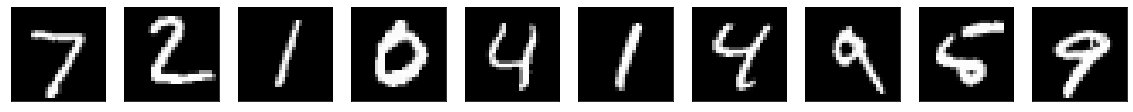

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [36]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


#### Setting up parameters

In [37]:
input_size = 784
batch_size = 200   
hidden1 = 50
hidden2 = 50

#### Building the FCN Model

In [38]:
###4.Build the model

model = Sequential()     

model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


#### Training The Model

In [24]:
# Fitting on Data
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=100, verbose=2,validation_split=0.2)
###5.Test 

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 1s - loss: 0.1406 - acc: 0.9605 - val_loss: 0.1642 - val_acc: 0.9535
Epoch 2/100
 - 1s - loss: 0.1398 - acc: 0.9602 - val_loss: 0.1637 - val_acc: 0.9534
Epoch 3/100
 - 1s - loss: 0.1389 - acc: 0.9605 - val_loss: 0.1623 - val_acc: 0.9539
Epoch 4/100
 - 1s - loss: 0.1383 - acc: 0.9611 - val_loss: 0.1620 - val_acc: 0.9539
Epoch 5/100
 - 1s - loss: 0.1374 - acc: 0.9610 - val_loss: 0.1637 - val_acc: 0.9538
Epoch 6/100
 - 1s - loss: 0.1367 - acc: 0.9618 - val_loss: 0.1622 - val_acc: 0.9538
Epoch 7/100
 - 1s - loss: 0.1359 - acc: 0.9614 - val_loss: 0.1616 - val_acc: 0.9550
Epoch 8/100
 - 1s - loss: 0.1351 - acc: 0.9620 - val_loss: 0.1613 - val_acc: 0.9541
Epoch 9/100
 - 1s - loss: 0.1342 - acc: 0.9624 - val_loss: 0.1611 - val_acc: 0.9545
Epoch 10/100
 - 1s - loss: 0.1335 - acc: 0.9628 - val_loss: 0.1609 - val_acc: 0.9542
Epoch 11/100
 - 1s - loss: 0.1330 - acc: 0.9624 - val_loss: 0.1595 - val_acc: 0.9547
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.0942 - acc: 0.9738 - val_loss: 0.1511 - val_acc: 0.9579
Epoch 98/100
 - 1s - loss: 0.0940 - acc: 0.9740 - val_loss: 0.1499 - val_acc: 0.9572
Epoch 99/100
 - 1s - loss: 0.0936 - acc: 0.9740 - val_loss: 0.1503 - val_acc: 0.9581
Epoch 100/100
 - 1s - loss: 0.0934 - acc: 0.9739 - val_loss: 0.1501 - val_acc: 0.9573


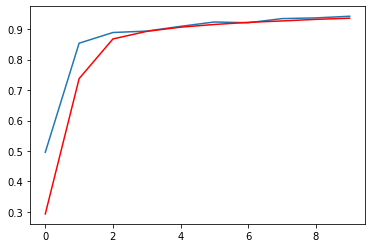

In [39]:
# plot learning curves
plt.plot(history.history["val_acc"])
plt.plot(history.history["acc"],'r-')

#### Testing The Model

10000/10000 [==============================] - 27s 3ms/step

Test accuracy: 0.1105
[8 8 1 8 1 7 1 8 8 4]


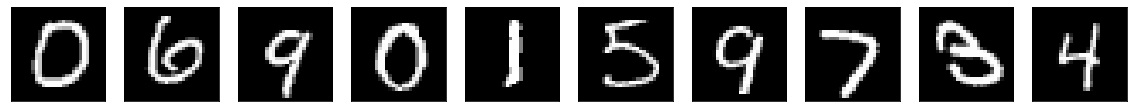

In [40]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

## MNIST using LeNet-5 (a wellknown and simple Convolutional Neural Network)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 72s - loss: 2.2781 - acc: 0.2245 - val_loss: 2.2403 - val_acc: 0.3191
Epoch 2/10
 - 3s - loss: 1.8743 - acc: 0.5232 - val_loss: 0.9336 - val_acc: 0.7751
Epoch 3/10
 - 3s - loss: 0.5733 - acc: 0.8464 - val_loss: 0.3957 - val_acc: 0.8867
Epoch 4/10
 - 3s - loss: 0.3877 - acc: 0.8872 - val_loss: 0.3213 - val_acc: 0.9081
Epoch 5/10
 - 3s - loss: 0.3360 - acc: 0.9005 - val_loss: 0.2942 - val_acc: 0.9156
Epoch 6/10
 - 3s - loss: 0.3036 - acc: 0.9095 - val_loss: 0.2819 - val_acc: 0.9134
Epoch 7/10
 - 3s - loss: 0.2784 - acc: 0.9176 - val_loss: 0.2464 - val_acc: 0.9304
Epoch 8/10
 - 3s - loss: 0.2584 - acc: 0.9229 - val_loss: 0.2364 - val_acc: 0.9297
Epoch 9/10
 - 3s - loss: 0.2415 - acc: 0.9275 - val_loss: 0.2426 - val_acc: 0.9247
Epoch 10/10
 - 3s - loss: 0.2252 - acc: 0.9325 - val_loss: 0.2026 - val_acc: 0.9431


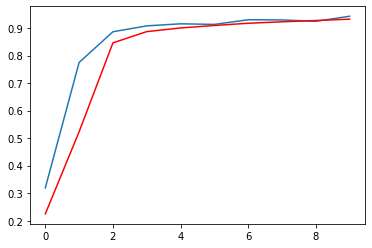

In [41]:
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout
# plot learning curves
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())
model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')

history = model.fit(X_train.reshape(60000,28,28,1), Y_train, batch_size=batch_size, epochs=10, verbose=2,validation_split=0.2)

# plot learning curves
plt.plot(history.history["val_acc"])
plt.plot(history.history["acc"],'r-')

In [30]:
print(model.count_params())
model.summary()

60074
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)                10164     
____

In [31]:
# loading pretrainined models
from keras.applications.vgg16 import VGG16
clf = VGG16()
# see this link for further reading: https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

553467904/553467096 [==============================] - 53s 0us/step


In [32]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________